# Market Growth
## by Joshua Beasley

## Investigation Overview
The goal of this investigation was to find ways to increase market share. I focused heailvy on the borrowing habits of consumers.

Initially my aim was to find trends in the data which could be used to find the best time of year for Prosper to advertise their loans to different income groups. In this area I discovered that genrally every income range followed a similar pattern for borrowing money. People borrow more in the wither months and less in summer. I decided the company could try to target more specific groups and found that more than half of all loans from prosper were for debt consolidation. What's more is that debt consolidation loans followed the same pattern that the overall data was giving me (more loans in winter, less in summer). I decided to examine a few of the other loan Listing Categories and found some trends which may help the marketing team target different groups using a series of small ad campaigns.

## Dataset Overview
The dataset used was a csv file with information on over 110,000 loans and their borrowers. The data is from a company called Prosper and spans from 2006 to 2014. A pdf with definitions for all variables in the dataset can be found attached to this project.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
df = pd.read_csv('loans.csv')

In [6]:
#change string object to datetime for df.LoanOriginationDate
df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)

#create new columns with month and year
df['Month'] = df.LoanOriginationDate.dt.month
df['Year'] = df.LoanOriginationDate.dt.year

#rename awkward column name
df = df.rename(columns={'ListingCategory (numeric)': 'ListingCategory'})
#replace numeric categories with category values found in the prosper loans variable definitions pdf.
categories = {0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan',
              5:'Student Use', 6:'Auto', 7:'Other', 8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure',
              11:'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental',
              16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}
df['ListingCategory'].replace(to_replace = categories, inplace = True);

## Visual 1

The first visual is a violin plot showing the distribution of loans for each age range. Interesting notes: While most tails reach as high as 25000 dollars, lower income ranges tend to have fat distributions in the lower loan amount with long this tails reaching toward the high loan values. A very interesting point to the distributions is that they all bubble around 5000 dollar intervals, suggesting people tend to borrow in intervals of 5000.

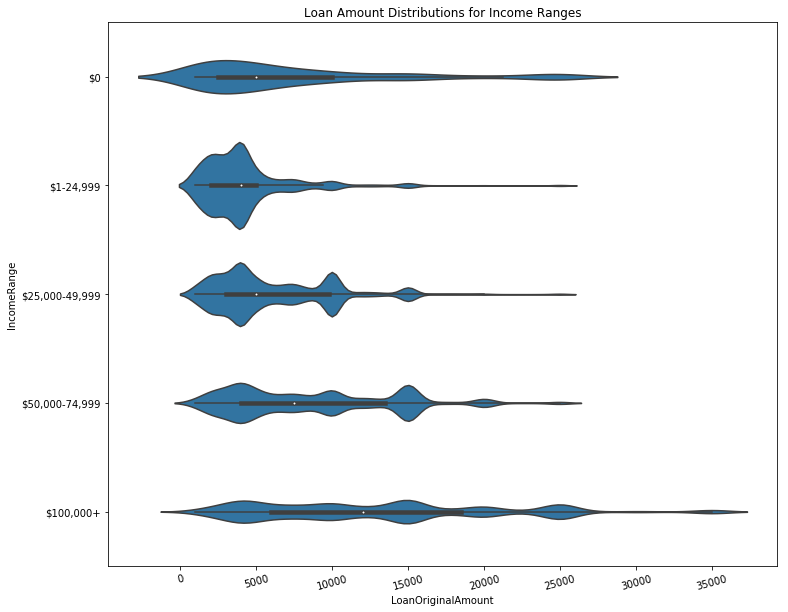

In [9]:
base_color = sb.color_palette()[0]
income_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$100,000+']
plt.figure(figsize = (12,10))
sb.violinplot(data = df, y = 'IncomeRange', x = 'LoanOriginalAmount', order = income_order, color = base_color)
plt.xticks(rotation = 15)
plt.title('Loan Amount Distributions for Income Ranges');

## Visual 2

Our second visual is of The total number of loans by month for each income from 2006-2014. I believed in making this that there would be something more telling in it, however, it appears that month to month generally the same histogram is represented in different sizes. I believed that each bar would follow a different curve, but they all follow approximately the same.

<Figure size 864x576 with 0 Axes>

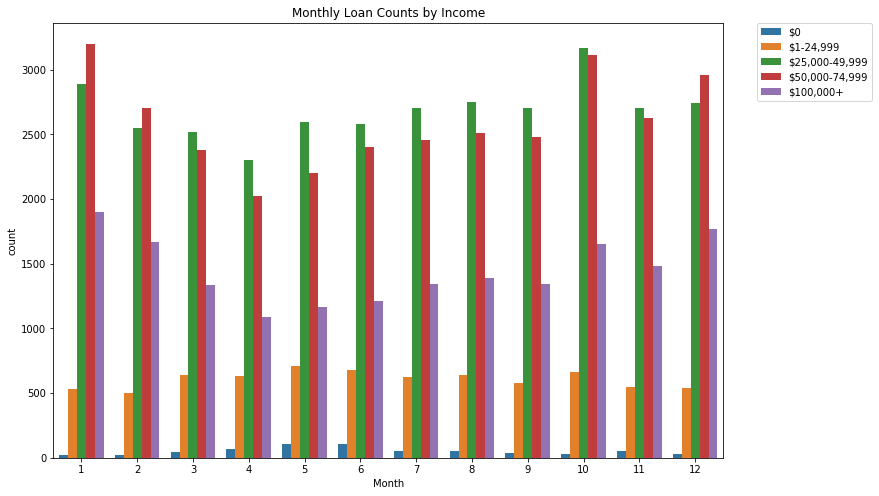

<Figure size 864x576 with 0 Axes>

In [10]:
income_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$100,000+']
plt.figure(figsize =(12,8))
sb.countplot(data = df, x = 'Month', hue = 'IncomeRange', hue_order = income_order)
plt.title('Monthly Loan Counts by Income')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize =(12,8))

## Visual 3
Exploring loans by income proved fruitless so I moved on to the purpose of the loans. The bar chart below shows the number of loans for each category. The number of loans for debt consolidation is pretty staggering and is definitely the companies cash cow so we'll look at other areas for expansion.

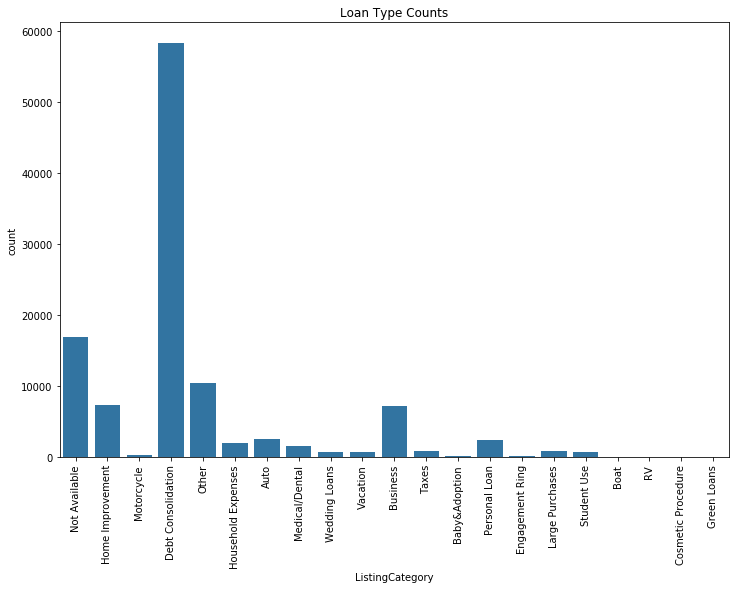

In [11]:
plt.figure(figsize = (12,8))
sb.countplot(data = df, x = 'ListingCategory', color = base_color)
plt.title('Loan Type Counts')
plt.xticks(rotation = 90);

## Visual 4

Our last visual is of the total dollars borrowed in each month for a few interesting loan types. Each loan type is depicted by a different colour.

I separated loans by month and totaled their values to get an idea of how much Prosper has lent out each month (over the years) for each category.

The only dramatic trends noted here are:

Personal Loans are popular in the first quater of the year, and VERY popular in the second quater.
Wedding Loans are most popular around Feb and Sept/Oct
Home Improvement Loans are very popular but have large dips in April, Sept, and Nov.
Business Loans are most popular in Jan
Auto Loans are pretty consistent
Engagement Ring Loans are consistent but account for a small amount of dollars lent.


Suggestion: Debt Consolidation is the largest reason for Loans with prosper and is definitely their cash cow, but the marketing team could use this information to develop a series of ads to target specific people at certain times of year though the use of web advertising.

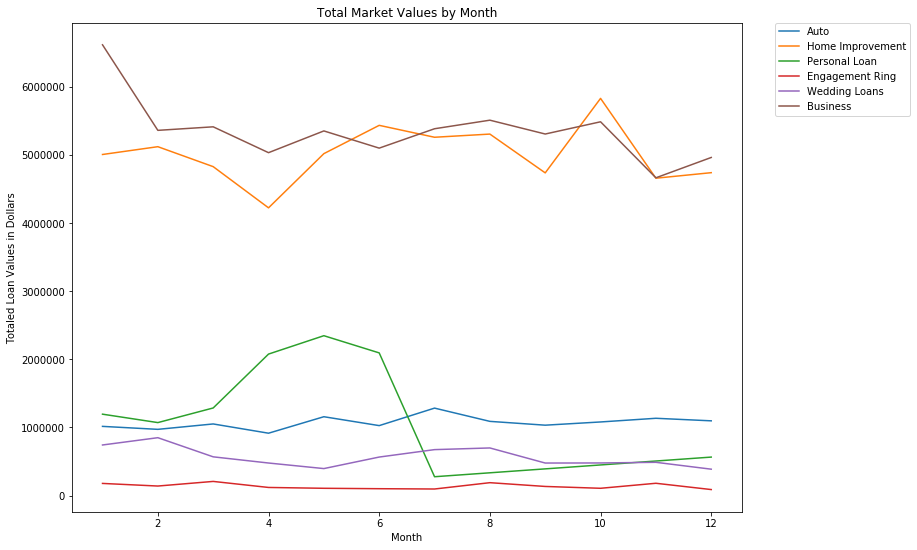

In [15]:
interest_categories = ['Auto', 'Home Improvement', 'Personal Loan', 'Engagement Ring', 'Wedding Loans', 'Business']
vals = df[df.ListingCategory.isin(interest_categories)].groupby(['Month', 'ListingCategory'])['LoanOriginalAmount'].sum()
vals = vals.reset_index()
fig = plt.figure(figsize = (12,9))
ax = fig.add_axes([.125,.125,.775,.755])
for label in interest_categories:
    vals[vals.ListingCategory == label].plot(x = 'Month', y = 'LoanOriginalAmount', ax = ax)
    plt.title('Total Market Values by Month')
    plt.xlabel('Month')
    plt.ylabel('Totaled Loan Values in Dollars')
    plt.legend(labels = interest_categories, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);